In [13]:
from queue import Queue
import numpy as np
import matplotlib.pyplot as plt
import vk_api
from vkwave.api.token.token import *
from vkwave.api import API
from vkwave.client import AIOHTTPClient


In [16]:
t = Token("af37c0e4af37c0e4af37c0e4dfaf5ade90aaf37af37c0e4f2b8ef69e6eeb2790b8d47a1")
token = BotSyncSingleToken(t)
api = API(tokens=token, clients=AIOHTTPClient())
vk = api.get_context()

In [6]:
u_id = vk.users.get()[0]["id"]

In [7]:
subs = vk.users.getSubscriptions(user_id=u_id)

In [8]:
group_ids = str(subs["groups"]["items"])[1:-1]
group_ids

'177318222, 92423422, 31272583, 54722976, 144519014, 176968119'

In [45]:
async def get_nth_level_friends_count(s, level):
    q = Queue()
    users = []
    q.put((s, 0))

    while not q.empty():
        (id,l) = q.get()
        print("+", end="")

        if l==level:
            break
        
        try:
            for f in (await vk.friends.get(user_id=id)).response.items:
                q.put((f, l+1))
                users.append(f)
        except Exception:
            pass
    return len(users), len(set(users))


In [46]:
counts = []
for fi in (await vk.friends.get(user_id=549070476)).response.items:
    print(f"for id = {fi} ", end="")
    total, uniq = await get_nth_level_friends_count(fi, 2)
    counts.append((total,uniq, fi))
    print()
counts

for id = 3668639 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

[(244612, 128865, 3668639),
 (81614, 71947, 97356635),
 (41875, 38781, 101738485),
 (0, 0, 119268784),
 (0, 0, 135465507),
 (6205, 5072, 137730445),
 (29110, 25139, 139755407),
 (19639, 17773, 155679907),
 (8784, 7577, 163149666),
 (39582, 28238, 174136317),
 (48187, 34802, 177259632),
 (31132, 29101, 182371794),
 (0, 0, 189198754),
 (15120, 12820, 269012082),
 (12530, 11326, 304469414),
 (4512, 4106, 310830263),
 (83663, 67467, 321829425),
 (179396, 127765, 326865631),
 (569, 516, 347321856),
 (11166, 9162, 450098009),
 (5081, 3999, 466469080),
 (4075, 3535, 593939055),
 (1026, 978, 607581289)]

In [65]:
results = np.array(counts)
s_res = results[results[:,0]!=0]
s_res = np.sort(s_res, axis=0)
s_res


array([[      569,       516,   3668639],
       [     1026,       978,  97356635],
       [     4075,      3535, 101738485],
       [     4512,      3999, 137730445],
       [     5081,      4106, 139755407],
       [     6205,      5072, 155679907],
       [     8784,      7577, 163149666],
       [    11166,      9162, 174136317],
       [    12530,     11326, 177259632],
       [    15120,     12820, 182371794],
       [    19639,     17773, 269012082],
       [    29110,     25139, 304469414],
       [    31132,     28238, 310830263],
       [    39582,     29101, 321829425],
       [    41875,     34802, 326865631],
       [    48187,     38781, 347321856],
       [    81614,     67467, 450098009],
       [    83663,     71947, 466469080],
       [   179396,    127765, 593939055],
       [   244612,    128865, 607581289]])

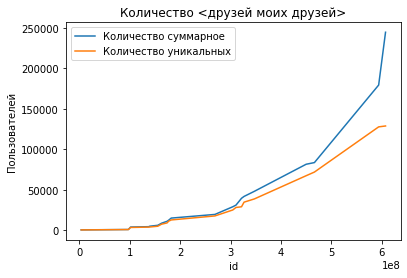

In [64]:
plt.plot(s_res[:, 2], s_res[:, 0:2])
plt.title("Количество <друзей моих друзей>")
plt.xlabel("id")
plt.ylabel("Пользователей")
plt.legend(("Количество суммарное", "Количество уникальных"))

In [40]:
(await vk.users.get(user_ids=549070476)).response[0]

UsersUserXtrCounters(deactivated=None, first_name='Vladislav', hidden=None, id=549070476, last_name='Sabenin', can_access_closed=True, is_closed=False, sex=None, screen_name=None, photo_50=None, photo_100=None, online_info=None, online=None, online_mobile=None, online_app=None, verified=None, trending=None, friend_status=None, mutual=None, first_name_nom=None, first_name_gen=None, first_name_dat=None, first_name_acc=None, first_name_ins=None, first_name_abl=None, last_name_nom=None, last_name_gen=None, last_name_dat=None, last_name_acc=None, last_name_ins=None, last_name_abl=None, nickname=None, maiden_name=None, domain=None, bdate=None, city=None, country=None, timezone=None, owner_state=None, photo_200=None, photo_max=None, photo_200_orig=None, photo_400_orig=None, photo_max_orig=None, photo_id=None, has_photo=None, has_mobile=None, is_friend=None, wall_comments=None, can_post=None, can_see_all_posts=None, can_see_audio=None, can_write_private_message=None, can_send_friend_request=No